In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

num_sides = [3, 4, 6, 8, 20]
global_order = 35

# Area Comparison

In [2]:
def polygon_area(n):
    return n * np.sin(np.pi / n) * np.cos(np.pi / n) / np.pi

for sides in num_sides:
    print(str(sides) + "gon: "+ str(polygon_area(sides)))

3gon: 0.4134966715663441
4gon: 0.6366197723675814
6gon: 0.826993343132688
8gon: 0.9003163161571062
20gon: 0.983631643083466


# Functions

## Making Gifs

In [3]:
for basis in ['k', 'z']:
    paths = [(str(path) + "sides/{}_basis/".format(basis)) for path in num_sides]

    for j in range(len(paths)):
        path = paths[j]
        gif = path + "{}gif.gif".format(basis)
        imgs = []

        if not os.path.exists(gif):
            print("### creating " + gif + " ###")
            for k in range(global_order + 1):
                file = path + "{}{}.png".format(basis, k)
                imgs.append(file)

            frames = [Image.open(image) for image in imgs]
            frame1 = frames[0]
            frame1.save(gif, format = "GIF", append_images = frames,
                 save_all = True, duration = 200, loop = 0)
        else:
            print("!!! " + gif + " already exists !!!")

!!! 3sides/k_basis/kgif.gif already exists !!!
!!! 4sides/k_basis/kgif.gif already exists !!!
!!! 6sides/k_basis/kgif.gif already exists !!!
!!! 8sides/k_basis/kgif.gif already exists !!!
!!! 20sides/k_basis/kgif.gif already exists !!!
!!! 3sides/z_basis/zgif.gif already exists !!!
!!! 4sides/z_basis/zgif.gif already exists !!!
!!! 6sides/z_basis/zgif.gif already exists !!!
!!! 8sides/z_basis/zgif.gif already exists !!!
!!! 20sides/z_basis/zgif.gif already exists !!!


## Importing Data

In [4]:
## building error dictionary
## errs[l2 or linf][z or k][function]
l2ks = {}
l2zs = {}
l2s = {"k": l2ks, "z": l2zs}

linfks = {}
linfzs = {}
linfs = {"k": linfks, "z": linfzs}

errs = {"l2": l2s, "linf": linfs}
errs["linf"]["k"]

for sides in num_sides:
    errs["l2"]["k"][sides] = {}
    errs["l2"]["z"][sides] = {}
    errs["linf"]["k"][sides] = {}
    errs["linf"]["z"][sides] = {}

In [5]:
# importing data
## importing errs
for err_type in ["l2", "linf"]:
    for basis in ["k", "z"]:
        for sides in num_sides:
            file = str(sides) + "sides/{}{}.txt".format(err_type, basis)
            with open(file) as f:
                reader = csv.reader(f)
                order = 0
                for row in reader:
                    errs[err_type][basis][sides][order] = float(row[0])
                    order += 1

# Plotting

## Functions

In [6]:
def plot_errors(sides, show_log = True, show_l2 = True, show_linf = False):
    function_l2k = []
    function_l2z = []
    
    function_linfk = []
    function_linfz = []
    
    for n in range(global_order + 1):
        function_l2k.append(errs["l2"]["k"][sides][n])
        function_l2z.append(errs["l2"]["z"][sides][n])
        function_linfk.append(errs["linf"]["k"][sides][n])
        function_linfz.append(errs["linf"]["z"][sides][n])
    
    def plotter(data1, data2, title = '', show_log = False):
        plt.plot(data1, label="K Basis")
        plt.plot(data2, label="Z Basis", ls='dashed')
        plt.grid('both')
        plt.xlabel("Zernike Radial Order")
        plt.legend(framealpha=1)
        if show_log:
            plt.yscale("log")
            plt.ylabel("log of Relative L$^2$ Error")
            plt.savefig(f"{sides}sides/{sides}sides-log-err.png", dpi = 600)
        else:
            plt.ylabel("Relative L$^2$ Error")
            plt.savefig(f"{sides}sides/{sides}sides-err.png", dpi = 600)
        
#        plt.title(title)
        print(f"{sides}sides")
        plt.show()
    
    if show_l2:
        plotter(function_l2k, function_l2z, "L$^2$ Relative Error")
        if show_log:
            plotter(function_l2k, function_l2z, "L$^2$ Relative Error", True)
    
    if show_linf:
        plotter(function_linfk, function_linfz, "L$^\infty$ Relative Error")
        if show_log:
            plotter(function_linfk, function_linfz, "L$^\infty$ Relative Error", True)

## Triangle

### Errors

3sides


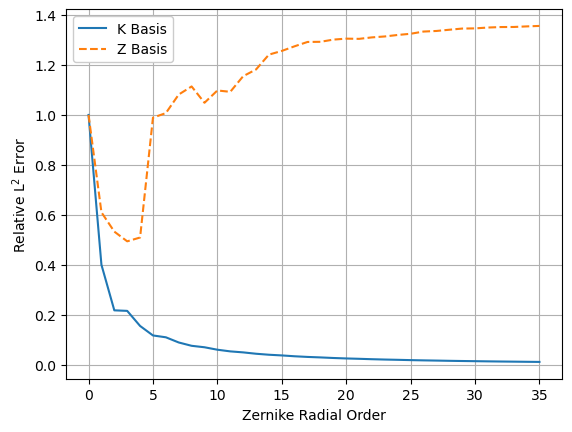

3sides


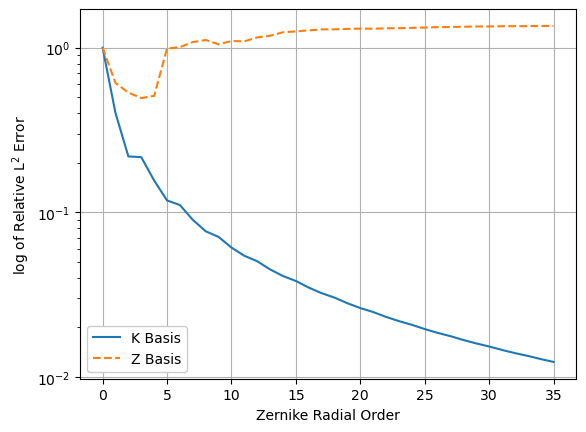

In [7]:
plot_errors(3)

## Square

### Errors

4sides


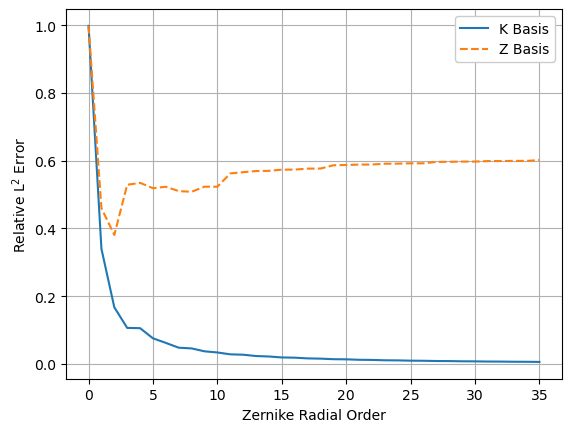

4sides


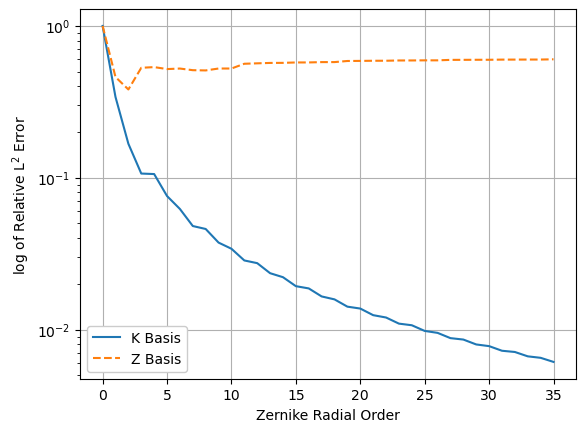

In [8]:
plot_errors(4)

## Hexagon

### Errors

6sides


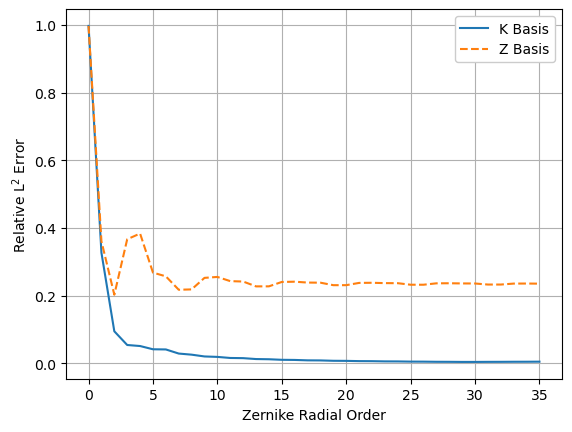

6sides


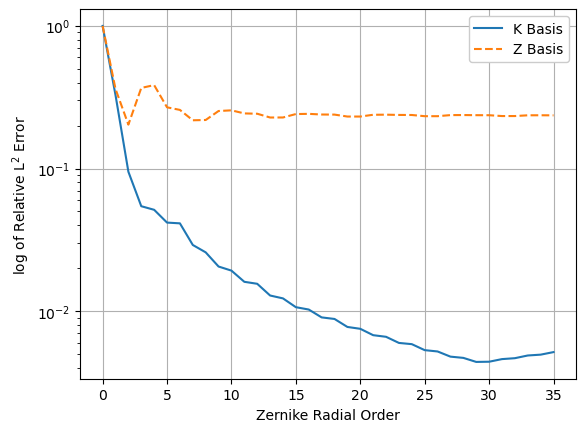

In [9]:
plot_errors(6)

## Octagon

### Errors

8sides


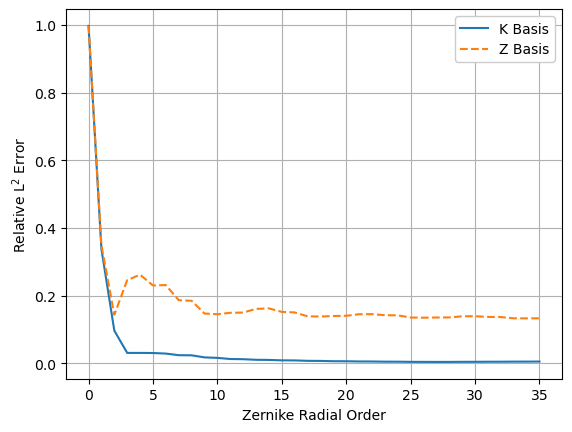

8sides


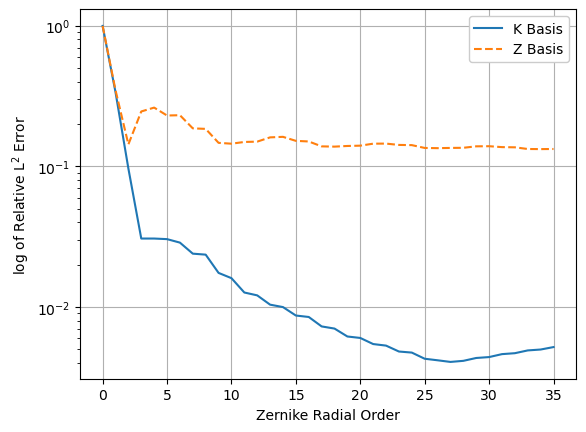

In [10]:
plot_errors(8)

## Icosagon (20)

### Errors

20sides


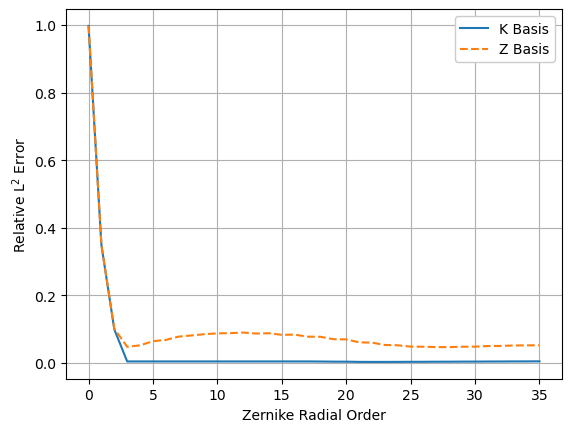

20sides


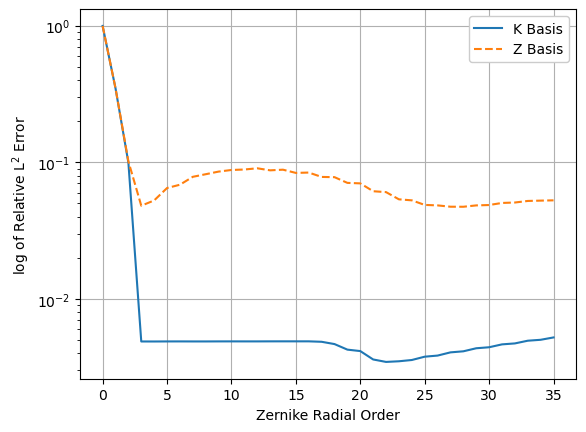

In [11]:
plot_errors(20)

## All Together

### Errors

In [12]:
plotting_errs = {"l2": {"k": {3: [], 4: [], 6: [], 8: [], 20: []}, 
                        "z": {3: [], 4: [], 6: [], 8: [], 20: []}}, 
                 "linf": {"k": {3: [], 4: [], 6: [], 8: [], 20: []}, 
                        "z": {3: [], 4: [], 6: [], 8: [], 20: []}}}

for err_type in ["l2", "linf"]:
    for basis in ["k", "z"]:
        for sides in num_sides:
            err_list = []
            for n in range(global_order + 1):
                err_list.append(errs[err_type][basis][sides][n])
            plotting_errs[err_type][basis][sides] = err_list

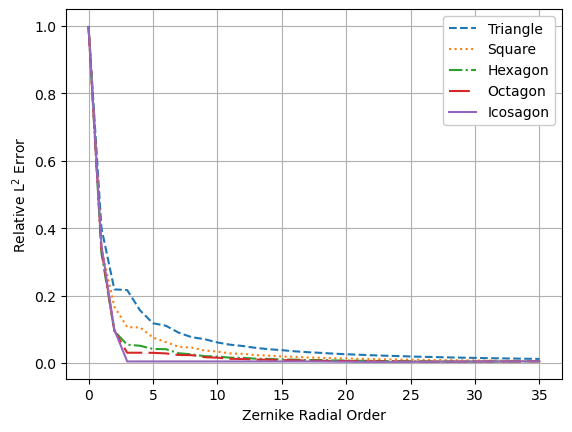

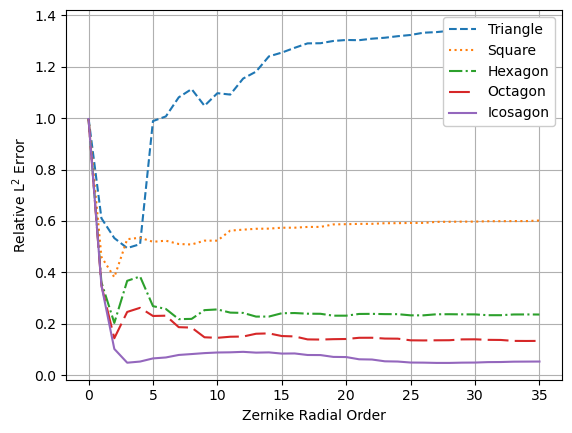

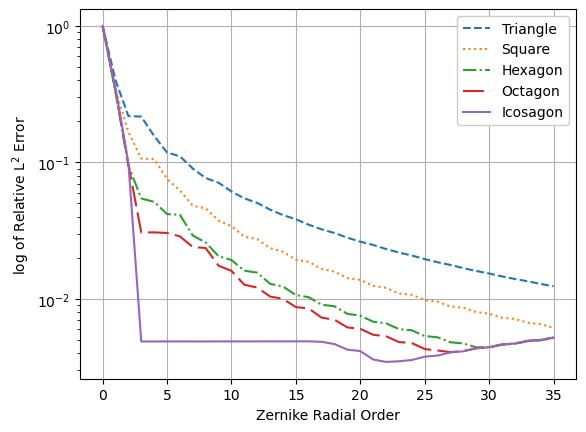

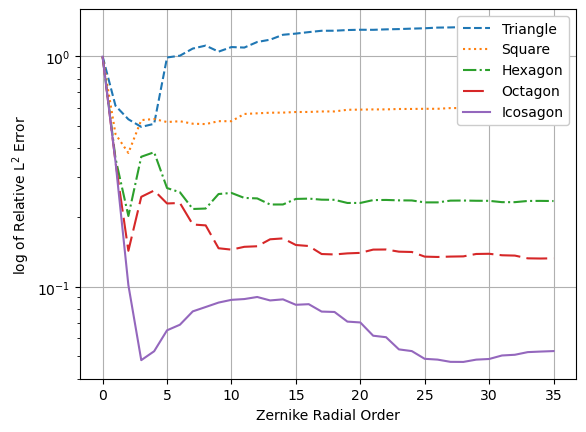

In [14]:
lss = ['dashed', 'dotted', 'dashdot', (0,(10,3)), 'solid']
shape = ['Triangle', 'Square', 'Hexagon', 'Octagon', 'Icosagon']

for show_log in [False, True]:
    for err_type in ["l2"]:
        for basis in ["k", "z"]:
            for i in range(len(num_sides)):
                errors = plotting_errs[err_type][basis][num_sides[i]]
                plt.plot(errors, ls=lss[i], label=shape[i])
#            plt.title(f"{err_type} Relative Error")
            plt.xlabel("Zernike Radial Order")
            plt.legend(loc=1, framealpha=1)
            plt.grid("both")
            if show_log:
                plt.yscale("log")
                plt.ylabel("log of Relative L$^2$ Error")
                plt.savefig(f"{basis}-log.png", dpi=600)
            else:
                plt.ylabel("Relative L$^2$ Error")
                plt.savefig(f"{basis}-linear.png", dpi=600)
            plt.show()